In [1]:
println("Hello World")

Hello World


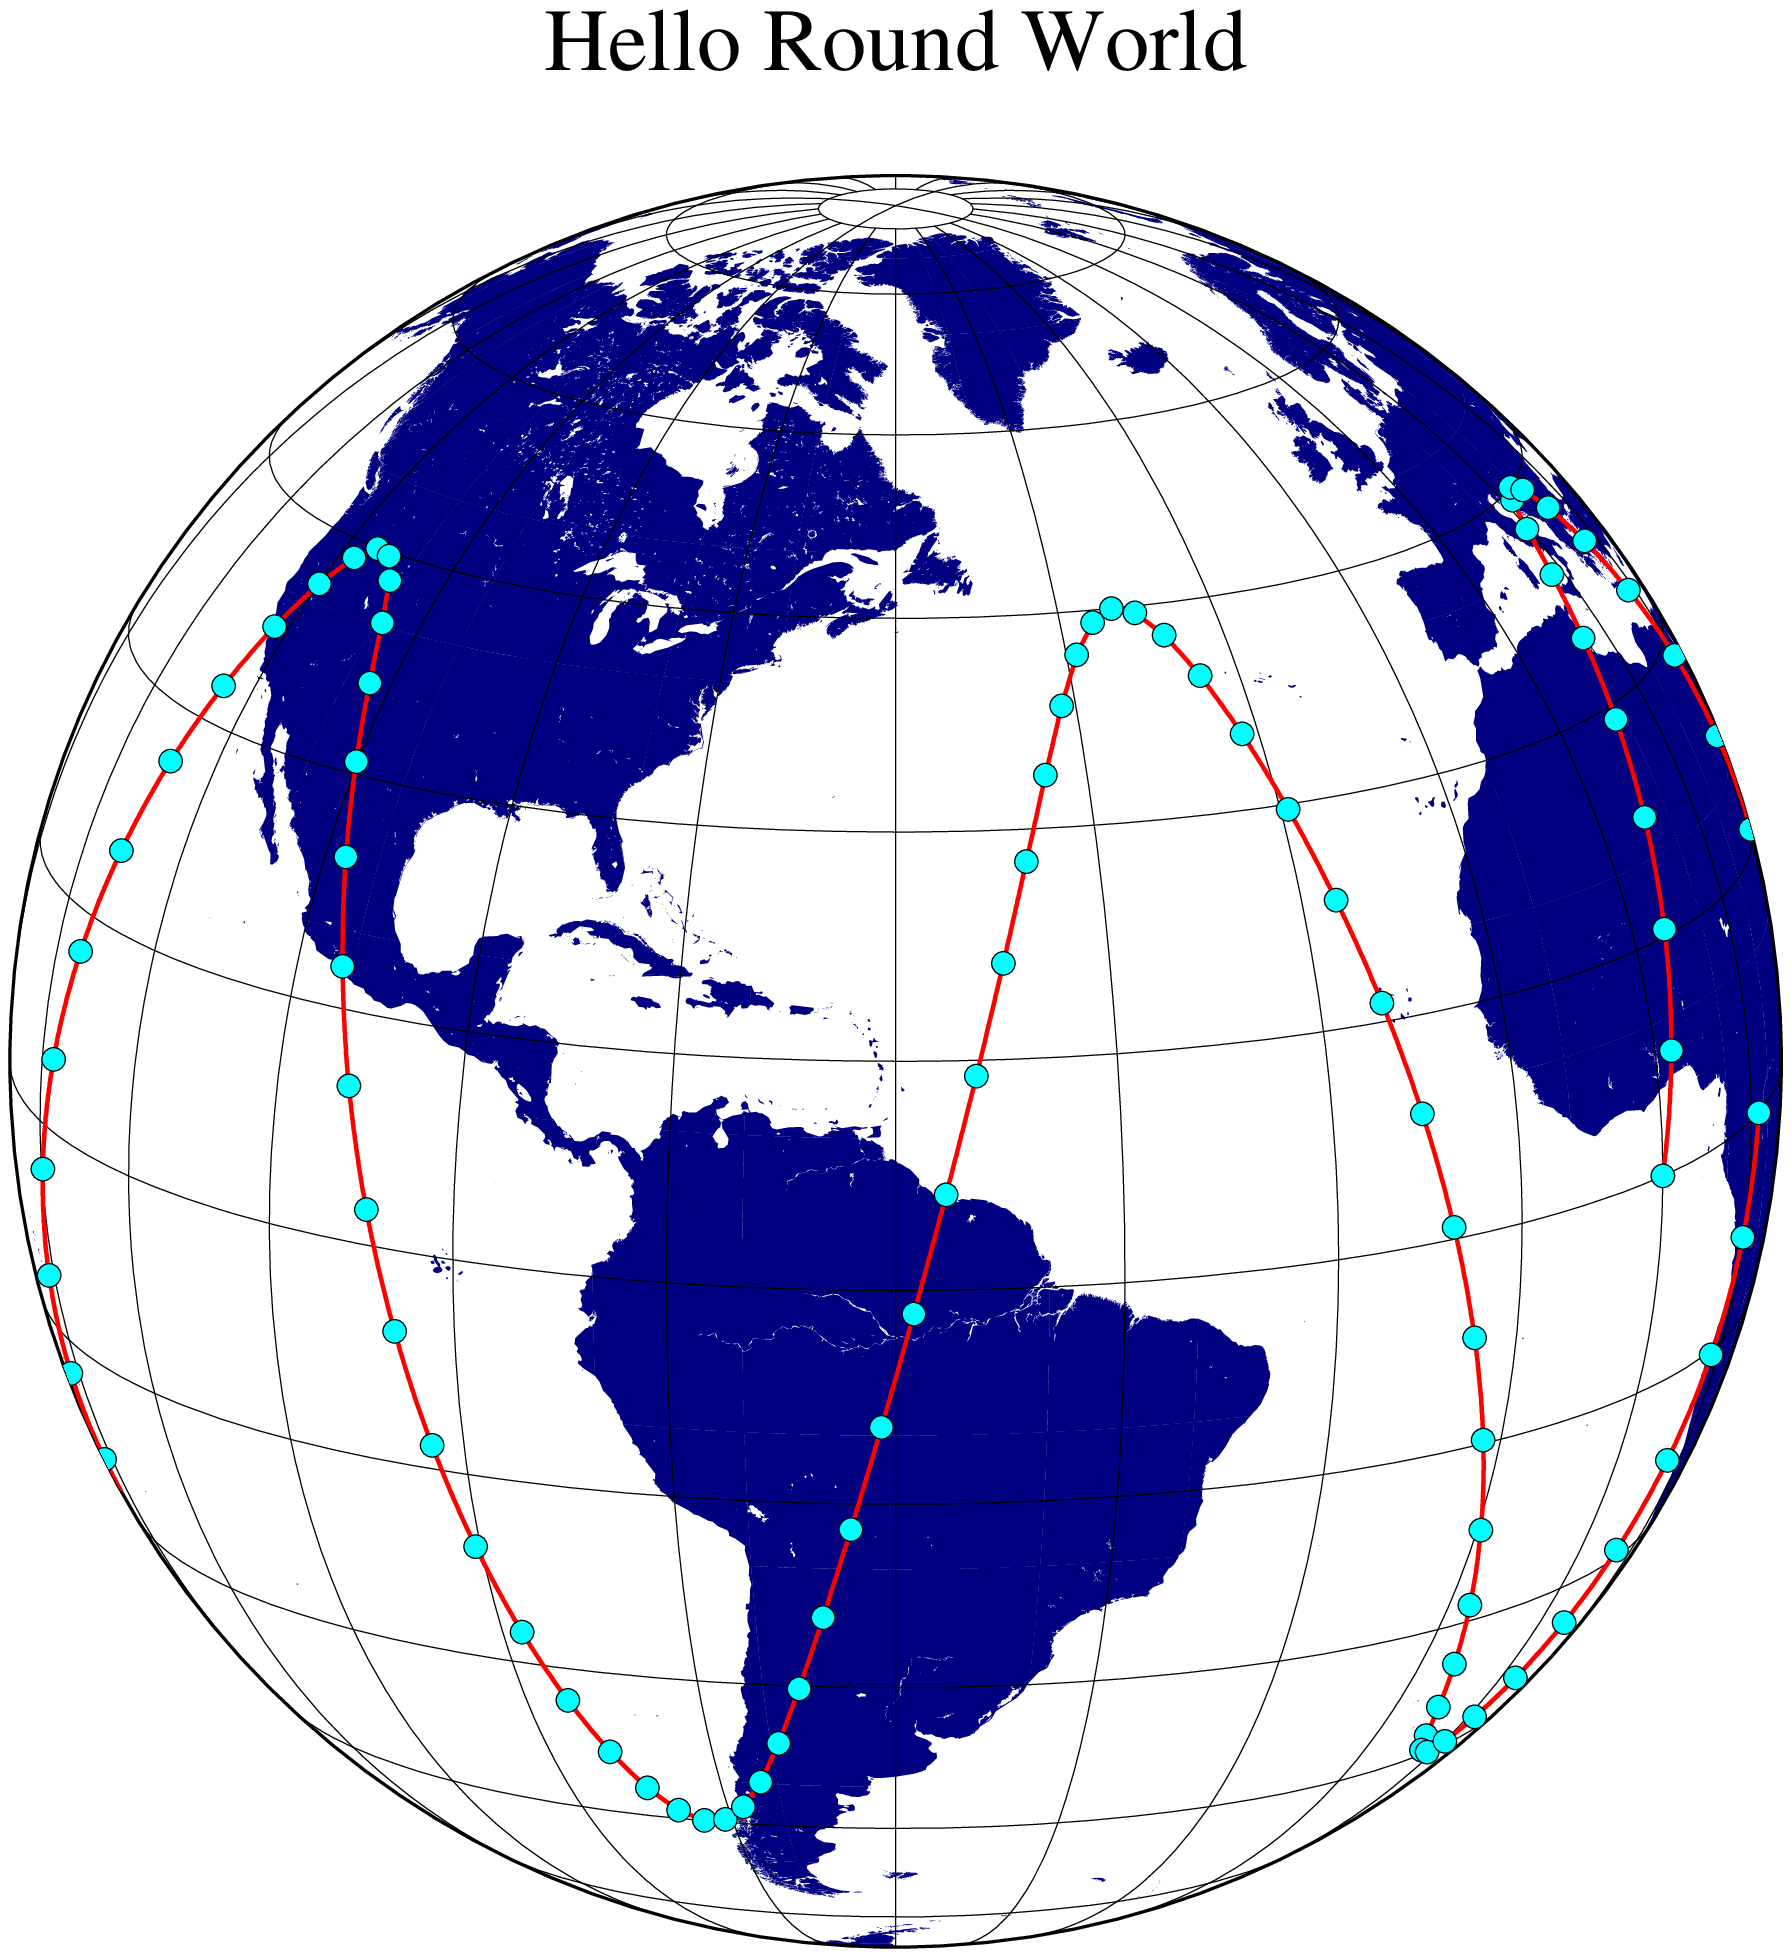

In [1]:
using GMT
x = GMT.linspace(0, 2pi, 180);	y = sin.(x/0.2)*45;
coast(region=:global, proj=(name=:ortho, center=(300,15)), frame=:g,
      land=:navy, title="Hello Round World")
plot!(x*60, y, lw=1, lc=:red, marker=:circle, size=0.2,
      markeredgecolor=0, markerfacecolor=:cyan, show=true)

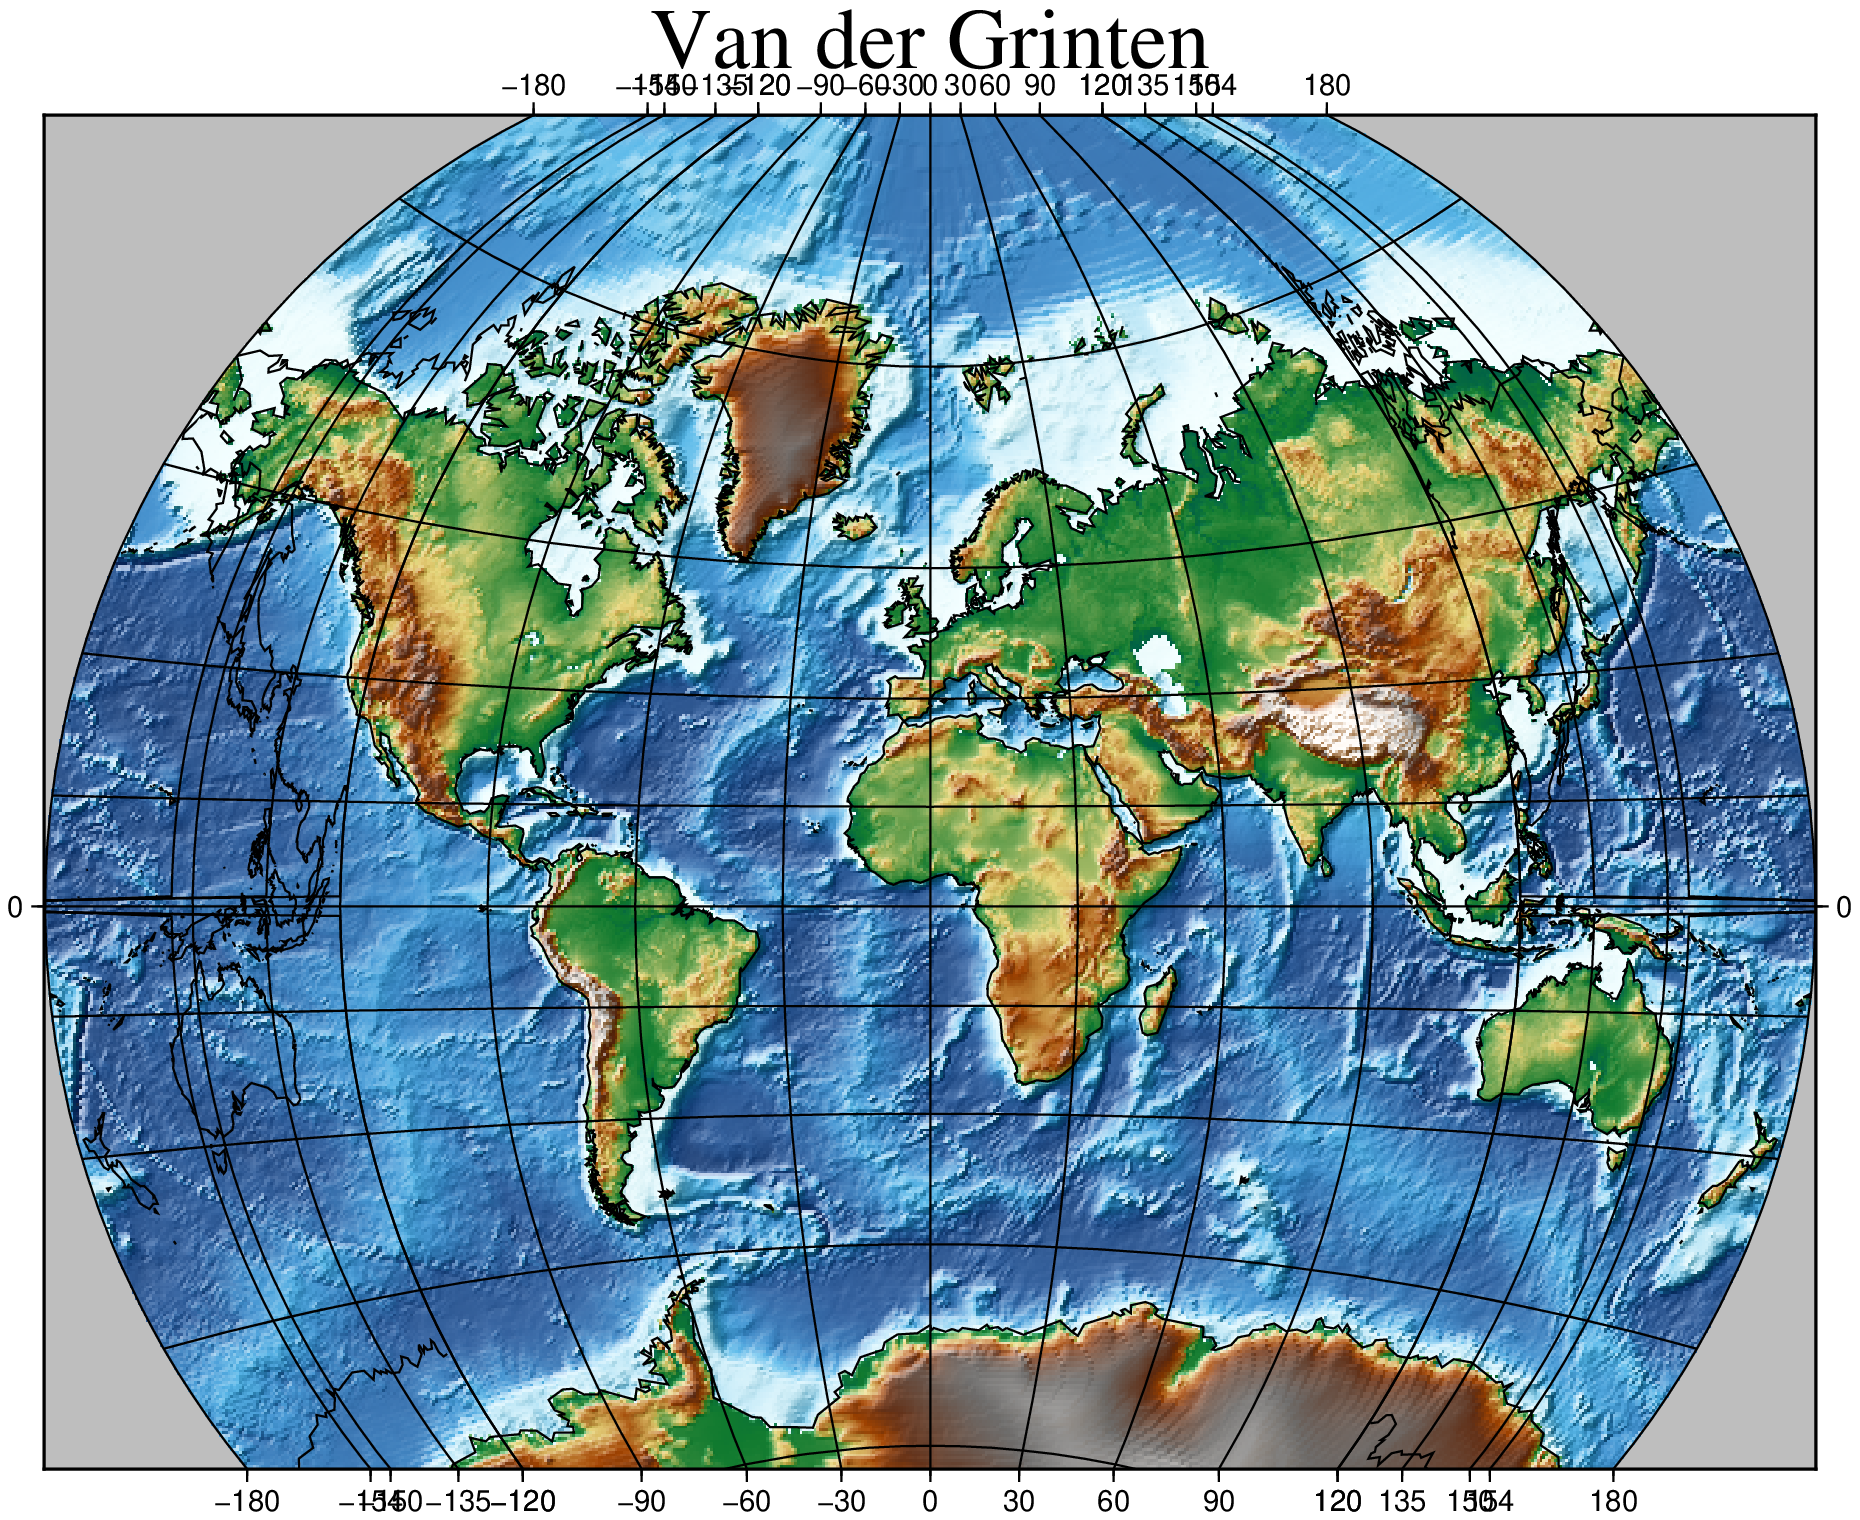

In [3]:
G, cl = worldrectangular("@earth_relief_30m_p", proj="vandg", latlim=(-70,85), coast=true);
grid = worldrectgrid(G);
grdimage(G, shade=true, plot=(data=cl,), cmap=:geo, B=:none, title="Van der Grinten")
plotgrid!(G, grid, show=true)

In [2]:
## Hmm error with gmt/gpx import. I updated gdal, but perhaps need to reinstall GMT?
data=gmtread("Go_north_.gpx", ogr=true);

┌ Warning: Could not read this OGR dataset. A reading error or there is no data in it.
└ @ GMT ~/.julia/packages/GMT/mhmDN/src/gmt_main.jl:1187


In [11]:
using Polyline
gpxFile = readGPX("./Go_north_.gpx")
gpxRoute = parseGPX(gpxFile);

In [12]:
# Encode polyline
polyline = encodePolyline(gpxRoute);

# Decode polyline
route = decodePolyline(polyline);

In [33]:
google_map_api="Gotta Get Yours";
url = mapsURL(polyline; token=google_map_api);

In [25]:
getMapImage(url; pathFig="fig1.png");

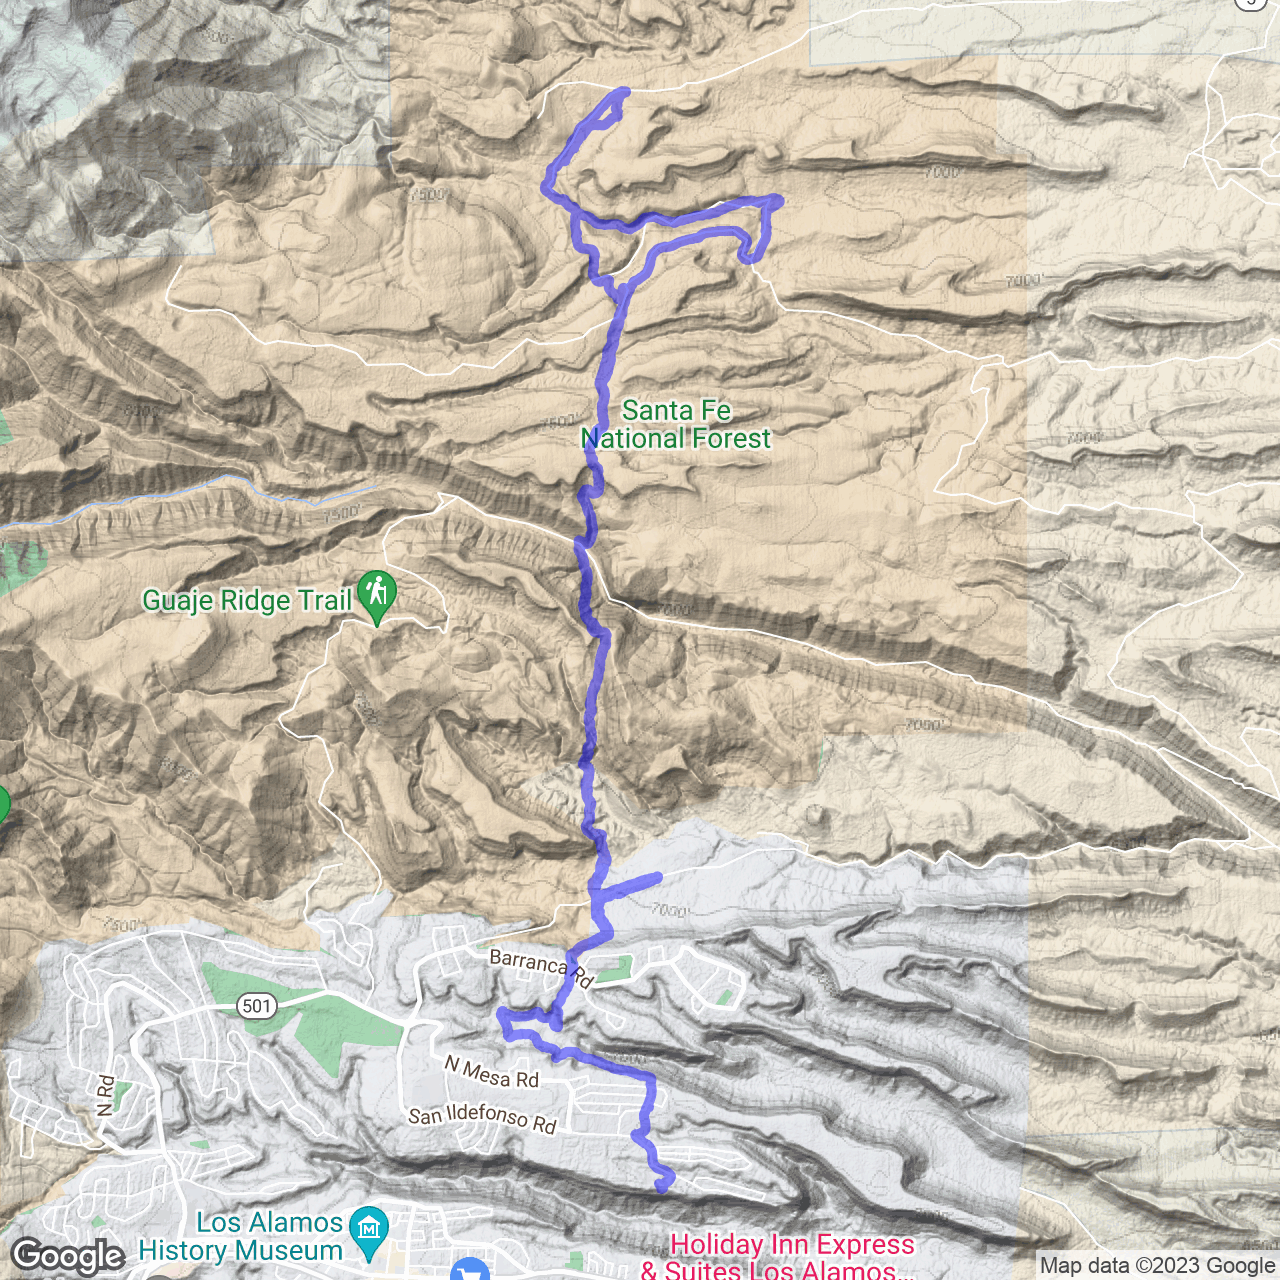

In [32]:
display("image/png", read("fig1.png"))